In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from math import log
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# load data and clean.
spam_data = pd.read_csv('/Users/shaomengyuan/Desktop/spam.csv', encoding='latin-1')

# droup the useless columns out.
spam_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

# rename columns of the dataframe.
spam_data.rename(columns={"v1":"Labels", "v2":"Email"}, inplace=True)

#  add a new column which replace spam or ham with 0 or 1.
spam_data['Label']=spam_data['Labels'].map({'ham':0, 'spam':1})

# drop the old labkes
spam_data.drop(['Labels'], axis=1, inplace=True)
spam_data.head()

spam_data['Label'].value_counts()

0    4825
1     747
Name: Label, dtype: int64

In [3]:
# split data
# total_email = 4825+747
def split(raw_data):
    train_index, test_index=list(),list()
    for i in range(raw_data.shape[0]):
        if np.random.uniform(0,1)<0.8:
            train_index +=[i]
        else:
            test_index +=[i]
    
    train_Data = raw_data.loc[train_index]
    train_Data.reset_index(inplace=True)
    train_Data.drop(['index'], axis=1, inplace=True)
    
    test_Data = raw_data.loc[test_index]
    test_Data.reset_index(inplace=True)
    test_Data.drop(['index'], axis=1, inplace=True)
    
    return train_Data, test_Data
# split(spam_data)

In [5]:
train_split = []
test_split = []
np.random.seed(1)
for i in range(10):
    train_split.append(split(spam_data)[0])
    test_split.append(split(spam_data)[1])    


In [3]:
# reset index
# train_Data.reset_index(inplace=True)
# train_Data.drop(['index'], axis=1, inplace=True)
# train_Data.head()

# create two list for store index
train_index, test_index=list(),list()
# set seed
np.random.seed(123)
# split dataset to train and test set
for i in range(spam_data.shape[0]):
#     split dataset to 0.8,0.2.
    if np.random.uniform(0,1)<0.8:
        train_index +=[i]
    else:
        test_index +=[i]

#  reset the index
train_Data = spam_data.loc[train_index]
train_Data.reset_index(inplace=True)
train_Data.drop(['index'], axis=1, inplace=True)

test_Data = spam_data.loc[test_index]
test_Data.reset_index(inplace=True)
test_Data.drop(['index'], axis=1, inplace=True)

In [29]:
# test_Data.reset_index(inplace=True)
# test_Data.drop(['index'], axis=1, inplace=True)
# test_Data.head()
# test_Data['Email'][1]

'I\x89Û÷m going to try for 2 months ha ha only joking'

In [5]:
def pre_process(emails):
    
    words = []
#     access stop word
    stop_words = stopwords.words("english")
#     stemming
    steming = PorterStemmer()

    for i in range(len(emails)):
#         lower words
        body = emails[i].lower()
#     token by words
        token = word_tokenize(body)
#     remove punctuation and stopwords
        body = [word for word in token if len(word)>2]
        body = [word for word in body if word not in stop_words]
        body = [steming.stem(word) for word in body]

        words.append(body)
    return words

In [14]:
def train(emails):
    
    total = emails.shape[0]
    sumSpam = emails['Label'].value_counts()[0]
    sumHam = emails['Label'].value_counts()[1]
    spam_word_count = 0
    ham_word_count = 0
    tfSpam = dict()
    tfHam = dict()
    idfSpam = dict()
    idfHam = dict()
    
#     prob_spam = dict()
#     prob_ham = dict()
#     sum_tf_spam = 0
#     sum_tf_ham = 0
    length_spam = dict()
    length_ham = dict()
    
    processed_messages = pre_process(emails['Email'])
    vocabulary = list()

    for i in range(total):
        body = processed_messages[i]
        unique_words = list()
        for word in body:            
            if emails['Label'][i]==1:
                tfSpam[word] = tfSpam.get(word, 0) + 1
                length_spam[word] = length_spam.get(word, 0) + len(body)
#                 print(length_spam)
                spam_word_count += 1
#             print(spam_word_count)
            else:
                tfHam[word] = tfHam.get(word, 0) + 1
                ham_word_count += 1
                length_ham[word] = length_ham.get(word, 0) + len(body)

            if word not in unique_words:
                unique_words += [word]
                
            if word not in vocabulary:
                vocabulary += [word]

        for word in unique_words:
            if emails['Label'][i]==1:
                idfSpam[word] = idfSpam.get(word, 0) + 1
            else:
                idfHam[word] = idfHam.get(word, 0) + 1
    prob_spam_mails, prob_ham_mails = sumSpam/total, sumHam/total
#     print(tfHam)
#     print(idfHam)
    return (length_ham, length_spam, tfHam, tfSpam, idfHam, idfSpam, prob_spam_mails,
            prob_ham_mails, vocabulary, spam_word_count, ham_word_count, total)
# train(train_Data)

## very slow

In [9]:
# (length_ham, length_spam, tfHam, tfSpam, idfHam, idfSpam, prob_spam_mails,
# prob_ham_mails, vocabulary,spam_word_count, ham_word_count, total) = train(train_Data)

In [11]:
def tf_idf(train_Data):
    # P̂(xi∣ωj)= (∑tf(xi,d∈ωj)+α)/(∑Nd∈ωj+α⋅V)
# P(word|spam) = (N(word,spam)+1)/(N(spam_message)+len(vocabulary))
    (length_ham, length_spam, tfHam, tfSpam, idfHam, idfSpam, prob_spam_mails,prob_ham_mails, vocabulary,spam_word_count, ham_word_count, total) = train(train_Data)
    prob_spam = dict()
    prob_ham = dict()
    sum_tf_spam = 0
    sum_tf_ham = 0
    for word in tfSpam:
#         print(idfHam.get(word,0))
#         prob_spam[word] = tfSpam[word] * log(total/idfSpam[word])
# TF word
        sum_tf_spam += tfSpam[word]/length_spam[word]
#     print(sum_tf_idf_spam)
    for word in tfSpam:
        prob_spam[word] = ((tfSpam[word]+1)/(spam_word_count+len(vocabulary)))*log(total/idfSpam[word])
#         len(list(prob_spam.keys()+len(list(prob_ham.keys()
#     print(prob_spam)
    for word in tfHam:
#         prob_ham[word] = tfHam[word] * log(total/idfHam[word])
        sum_tf_ham += tfHam[word]/length_ham[word]    
#     print(sum_tf_idf_ham)
    for word in tfHam:
        prob_ham[word] = ((tfHam[word]+1)/(ham_word_count+len(vocabulary)))*log(total/idfHam[word])
        
    return prob_ham, prob_spam, idfHam, idfSpam, spam_word_count, ham_word_count, prob_spam_mails, prob_ham_mails
# tf_idf()


In [11]:
def bow(train_Data):
        # P̂(xi∣ωj)= (∑tf(xi,d∈ωj)+α)/(∑Nd∈ωj+α⋅V)
# P(word|spam) = (N(word,spam)+1)/(N(spam_message)+len(vocabulary))
    prob_spam = dict()
    prob_ham = dict()
    (length_ham, length_spam, tfHam, tfSpam, idfHam, idfSpam, prob_spam_mails, prob_ham_mails, vocabulary,spam_word_count, ham_word_count, total) = train(train_Data)

    for word in tfSpam:
        prob_spam[word] = (tfSpam[word]+1)/(spam_word_count+len(list(tfSpam.keys())))
        
    for word in tfHam:
        prob_ham[word] = (tfHam[word]+1)/(ham_word_count+len(tfHam.keys()))
        
    return prob_ham, prob_spam,idfHam, idfSpam,spam_word_count, ham_word_count, prob_spam_mails, prob_ham_mails



In [12]:
def classify(message, train_Data):
    p_spam, p_ham = 0, 0
    
    if method == 'tfidf':
        prob_ham, prob_spam, idfHam, idfSpam, spam_word_count, ham_word_count, prob_spam_mails, prob_ham_mails = tf_idf(train_Data)
    else:
        prob_ham, prob_spam, idfHam, idfSpam, spam_word_count, ham_word_count, prob_spam_mails, prob_ham_mails = bow(train_Data)
    
    for word in message:

        if word in prob_spam:
            p_spam += prob_spam[word]
            p_spam /= (idfSpam[word]/spam_word_count)

        if word in prob_ham:
            p_ham += prob_ham[word]
            p_ham /= (idfHam[word]/ham_word_count)

    p_spam *= prob_spam_mails
    p_ham *= prob_ham_mails

    
    if p_spam >= p_ham:
        return 1
    else:
        return 0

In [13]:
def prediction(emails, train_Data):
    tfidf = dict()
    bow = dict()
    body_email = pre_process(emails)
    
    for i in range(len(body_email)):
        tfidf[i] = classify(body_email[i], train_Data)
        bow[i] = classify(body_email[i], train_Data)
    return tfidf, bow

In [14]:
for i in range(len(test_split)):
    predicted_labels = prediction(test_split[i]['Email'], train_split[i])
    pred_tfidf = predicted_labels[0]
    pred_bow = predicted_labels[1]
    labels = test_split[i]['Label']

NameError: name 'method' is not defined

In [15]:
tfidf_label = list(pred_tfidf.values())
bow_label = list(pred_bow.values())
labels = np.array(labels)
print("tfidf:\n",confusion_matrix(labels, tfidf_label),"\naccuracy\n",accuracy_score(labels, tfidf_label))
print("bow:\n",confusion_matrix(labels, bow_label),"\naccuracy\n",accuracy_score(labels, bow_label))

NameError: name 'pred_tfidf' is not defined

In [6]:
def trains(emails):
    
    total = emails.shape[0]
    sumSpam = emails['Label'].value_counts()[0]
    sumHam = emails['Label'].value_counts()[1]
    spam_word_count = 0
    ham_word_count = 0
#     term frequency of spam and ham
    tfSpam = dict()
    tfHam = dict()
#     documents frequency of spam and ham
    idfSpam = dict()
    idfHam = dict()
     
    length_spam = dict()
    length_ham = dict()
    
#   preprocess the dataset  
    processed_messages = pre_process(emails['Email'])
    vocabulary = list()

#     get term frequency and documents frequency
    for i in range(total):
        body = processed_messages[i]
        unique_words = list()
        for word in body:            
            if emails['Label'][i]==1:
                tfSpam[word] = tfSpam.get(word, 0) + 1
                length_spam[word] = length_spam.get(word, 0) + len(body)
#                 print(length_spam)
                spam_word_count += 1
#             print(spam_word_count)
            else:
                tfHam[word] = tfHam.get(word, 0) + 1
                ham_word_count += 1
                length_ham[word] = length_ham.get(word, 0) + len(body)

            if word not in unique_words:
                unique_words += [word]
                
            if word not in vocabulary:
                vocabulary += [word]

        for word in unique_words:
            if emails['Label'][i]==1:
                idfSpam[word] = idfSpam.get(word, 0) + 1
            else:
                idfHam[word] = idfHam.get(word, 0) + 1
                
    prob_spam_mails, prob_ham_mails = sumSpam/total, sumHam/total
    
    
    prob_spam_tfidf = dict()
    prob_ham_tfidf = dict()
    prob_spam_bow = dict()
    prob_ham_bow = dict()
    
#     tfidf
    for word in tfSpam:
        prob_spam_tfidf[word] = ((tfSpam[word]+1)/(spam_word_count+len(vocabulary))) * log(total/idfSpam[word])
    for word in tfHam:
        prob_ham_tfidf[word] = ((tfHam[word]+1)/(ham_word_count+len(vocabulary))) * log(total/idfHam[word])
    for word in tfSpam:
        prob_spam_bow[word] = (tfSpam[word]+1)/(spam_word_count+len(vocabulary))
    for word in tfHam:
        prob_ham_bow[word] = (tfHam[word]+1)/(ham_word_count+len(vocabulary))
    return (idfHam, idfSpam, prob_spam_mails,
            prob_ham_mails, prob_ham_bow, prob_ham_tfidf, prob_spam_bow, prob_spam_tfidf, spam_word_count, ham_word_count)


In [7]:
def predicts(test, train_Data):
#     predict = []
    
    (idfHam, idfSpam, prob_spam_mails,prob_ham_mails, prob_ham_bow,
     prob_ham_tfidf, prob_spam_bow, prob_spam_tfidf, spam_word_count, ham_word_count) = trains(train_Data)
    
    tfidf = dict()
    bow = dict()
    body_email = pre_process(test)
    
    for i in range(len(body_email)):
#         tfidf[i] = classify(body_email[i], train_Data)
#         bow[i] = classify(body_email[i], train_Data)
        p_spam_tfidf, p_ham_tfidf = 0, 0
        for word in body_email[i]:
            if word in prob_spam_tfidf:
                p_spam_tfidf += prob_spam_tfidf[word]
                p_spam_tfidf /= (idfSpam[word]/spam_word_count)
            if word in prob_ham_tfidf:
                p_ham_tfidf += prob_ham_tfidf[word]
                p_ham_tfidf /= (idfHam[word]/ham_word_count)
                
        p_spam_tfidf *= prob_spam_mails
        p_ham_tfidf *= prob_ham_mails
        
        if p_spam_tfidf >= p_ham_tfidf:
            tfidf[i] = 1
        else:
            tfidf[i] = 0
            
        p_spam_bow, p_ham_bow = 0, 0
        for word in body_email[i]:
            if word in prob_spam_bow:
                p_spam_bow += prob_spam_bow[word]
                p_spam_bow /= (idfSpam[word]/spam_word_count)
            if word in prob_ham_bow:
                p_ham_bow += prob_ham_bow[word]
                p_ham_bow /= (idfHam[word]/ham_word_count)

        p_spam_bow *= prob_spam_mails
        p_ham_bow *= prob_ham_mails

        if p_spam_bow >= p_ham_bow:
            bow[i] = 1
        else:
            bow[i] = 0
        
    return tfidf, bow

In [8]:
tfidf_acc = dict()
bow_acc = dict()
conf_matrix_tfidf = dict()
conf_matrix_bow = dict()
for i in range(len(test_split)):
    predicted_labels = predicts(test_split[i]['Email'], train_split[i])
    pred_tfidf = predicted_labels[0]
    pred_bow = predicted_labels[1]
    labels = test_split[i]['Label']
    tfidf_label = list(pred_tfidf.values())
    bow_label = list(pred_bow.values())
    labels = np.array(labels)
    conf_matrix_tfidf[i] = confusion_matrix(labels, tfidf_label)
    conf_matrix_bow[i] = confusion_matrix(labels, bow_label)
    tfidf_acc[i] = accuracy_score(labels, tfidf_label)
    bow_acc[i] = accuracy_score(labels, bow_label)


NameError: name 'test_split' is not defined

In [25]:
print(tfidf_acc,"\n",bow_acc)

{0: 0.8748832866479925, 1: 0.8934497816593886, 2: 0.8920606601248885, 3: 0.8951111111111111, 4: 0.8799266727772685, 5: 0.883982683982684, 6: 0.8617886178861789, 7: 0.8861111111111111, 8: 0.8766519823788547, 9: 0.8896551724137931} 
 {0: 0.8888888888888888, 1: 0.9004366812227074, 2: 0.8965209634255129, 3: 0.896, 4: 0.8854262144821264, 5: 0.8917748917748918, 6: 0.8735320686540199, 7: 0.8898148148148148, 8: 0.8837004405286344, 9: 0.8948275862068965}


In [26]:
for i in range(len(test_split)):  
    print('tfidf:\n',conf_matrix_tfidf[i],'\n', 'bow:\n',conf_matrix_bow[i],'\n')
#   TP FP
#   FN TN 

tfidf:
 [[810 122]
 [ 12 127]] 
 bow:
 [[825 107]
 [ 12 127]] 

tfidf:
 [[880 113]
 [  9 143]] 
 bow:
 [[888 105]
 [  9 143]] 

tfidf:
 [[871 111]
 [ 10 129]] 
 bow:
 [[876 106]
 [ 10 129]] 

tfidf:
 [[854 108]
 [ 10 153]] 
 bow:
 [[855 107]
 [ 10 153]] 

tfidf:
 [[804 118]
 [ 13 156]] 
 bow:
 [[810 112]
 [ 13 156]] 

tfidf:
 [[874 120]
 [ 14 147]] 
 bow:
 [[882 112]
 [ 13 148]] 

tfidf:
 [[822 137]
 [ 16 132]] 
 bow:
 [[835 124]
 [ 16 132]] 

tfidf:
 [[818 113]
 [ 10 139]] 
 bow:
 [[822 109]
 [ 10 139]] 

tfidf:
 [[848 130]
 [ 10 147]] 
 bow:
 [[856 122]
 [ 10 147]] 

tfidf:
 [[896 108]
 [ 20 136]] 
 bow:
 [[902 102]
 [ 20 136]] 



In [27]:
tfidf_means = np.mean(list(tfidf_acc.values()))
bow_means = np.mean(list(bow_acc.values()))
print("tfidf:",tfidf_means,"\nbow:", bow_means)

tfidf: 0.8833621080093271 
bow: 0.8900922549998492


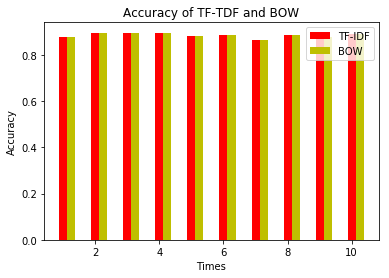

In [28]:
import matplotlib.pyplot as plt

# x = np.arange(10)
x = np.arange(1,len(tfidf_acc)+1)
y_tfidf = list(tfidf_acc.values())
y_bow = list(bow_acc.values())

plt.bar(x, y_tfidf, color = 'r', width = 0.25)
plt.bar(x+0.25, y_tfidf, color = 'y' , width = 0.25)
plt.legend(['TF-IDF', 'BOW'])
plt.title('Accuracy of TF-TDF and BOW')
plt.xlabel('Times')
plt.ylabel('Accuracy')

plt.show()

In [9]:
predicted_labels = predicts(test_Data['Email'], train_Data)
pred_tfidf = predicted_labels[0]
pred_bow = predicted_labels[1]
labels = test_Data['Label']
tfidf_label = list(pred_tfidf.values())
bow_label = list(pred_bow.values())
labels = np.array(labels)
conf_matrix_tfidf = confusion_matrix(labels, tfidf_label)
conf_matrix_bow = confusion_matrix(labels, bow_label)
tfidf_acc = accuracy_score(labels, tfidf_label)
bow_acc = accuracy_score(labels, bow_label)

In [34]:
tfidf_index= []
bow_index = []
for i in range(len(labels)):
    if labels[i] != tfidf_label[i]:
        tfidf_index.append(i)
    if labels[i] != bow_label[i]:
        bow_index.append(i)
same_wrong = set(tfidf_index).intersection(set(bow_index))

wrong_list = []
for i in same_wrong:
    wrong_list.append(test_Data['Email'][i])


pre_process(wrong_list)

[['bluray', 'player'],
 ['...'],
 ['sent', 'like'],
 ['tell', 'reach'],
 ['come', 'sec', 'somebodi', 'want', 'see'],
 ['record',
  'indic',
  'mayb',
  'entitl',
  '5000',
  'pound',
  'compens',
  'accid',
  'claim',
  'free',
  'repli',
  'claim',
  'msg',
  'stop',
  'txt',
  'stop'],
 ['reach', 'home', 'minut'],
 ['done'],
 ['jay', 'want', 'work', 'first', 'sound'],
 ['good', 'stuff'],
 ['knock',
  'knock',
  'txt',
  'whose',
  '80082',
  'enter',
  'weekli',
  'draw',
  'å£250',
  'gift',
  'voucher',
  'store',
  'choic',
  'www.tkls.com',
  'age16',
  'stoptxtstopå£1.50/week'],
 ['late', 'k.wish'],
 ['unni', 'thank', 'dear', 'recharge..rakhesh'],
 ['sorri', 'thangam', 'sorri', 'held', 'prasad'],
 ['hello',
  'love',
  'get',
  'interview',
  'today',
  'happi',
  'good',
  'boy',
  'think',
  'miss'],
 ['...'],
 ['tri',
  'contact',
  'respons',
  'offer',
  'new',
  'nokia',
  'fone',
  'camcord',
  'hit',
  'repli',
  'call',
  '08000930705',
  'deliveri'],
 ['guy', 'close'],

In [10]:
print("tfidf: ",tfidf_acc)
print("bow: ",bow_acc)

tfidf:  0.8076225045372051
bow:  0.8166969147005445


In [28]:
print("tfidf:\n",conf_matrix_tfidf)


tfidf:
 [[816 165]
 [ 35 109]]


In [30]:
print("bow:\n",conf_matrix_bow)

bow:
 [[823 158]
 [ 35 109]]


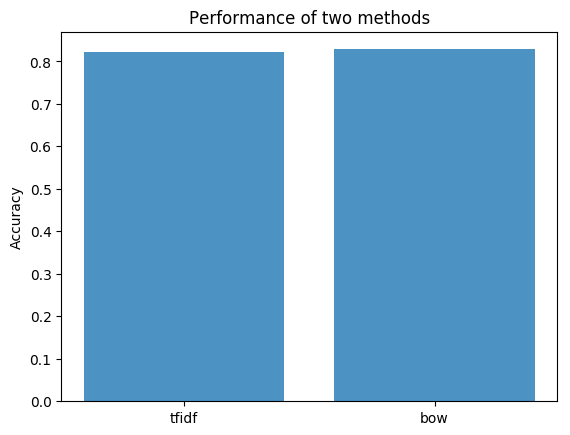

In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

methods = ('tfidf', 'bow')
y_pos = np.arange(len(methods))
performance = [tfidf_acc,bow_acc]

plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, methods)
plt.ylabel('Accuracy')
plt.title('Performance of two methods')

plt.show()